# Alura - 7 Days of Code - Dados - Machine Learning

![7DayOfCode-Logo](../imgs/7DaysOfCode-Logo.jpg)

Autor: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Objetivo](#objectives)
- [3.Desenvolvimento](#development)
- [3.1.Dia 1](#day_1)
- [3.2.Dia 2](#day_2)
- [3.3.Dia 3](#day_3)
- [3.4.Dia 4](#day_4)
- [3.5.Dia 5](#day_5)
- [4.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

Durante os 7 Days de Python Pandas, você vai treinar suas habilidades de manipulação, visualização e análise de dados utilizando Python Pandas.


---
<a id='objectives'></a>
## 2. Objetivo

O objetivo será explorar os dados de empréstimos dos acervos do sistema de bibliotecas da UFRN e, para isso, você passará por diversas funcionalidades que o Pandas pode oferecer, desde a importação de diversos formatos de dados, agregações, divisões e transformações de tabelas, e até a exportação de tabelas estilizadas com sua análise pronta para ser inserida em alguma aplicação.

---
<a id='development'></a>
## 3. Desenvolvimento

---
<a id='day_1'></a>
### 3.1. Dia 1

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import os
import glob
import pandas as pd

In [3]:
# Imports das bibliotecas de visualizações
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Alterar a exibição de float para duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Versões das bibliotecas mais usadas
print('Pandas versão ' + pd.__version__)

Pandas versão 1.5.3


In [6]:
# Função para carregar os dados de todos os arquivos csv de uma pasta
def carregar_dados_csv(pasta = 'dados'):
    
    # Obtenha a lista de arquivos CSV na pasta
    arquivos_csv = glob.glob(os.path.join(pasta, '*.csv'))

    # Verifique o caminho completo para a pasta
    # caminho_completo = os.path.join(os.getcwd(), pasta)
    
    # Obtenha a lista de arquivos CSV na pasta
    # arquivos_csv = glob.glob(os.path.join(caminho_completo, '*.csv'))
    
    # Verifique se existem arquivos CSV na pasta
    if not arquivos_csv:
        print("Nenhum arquivo CSV encontrado na pasta.")
        # print(f"Nenhum arquivo CSV encontrado na pasta {caminho_completo}.")
        
        return None
    else:
        # Carregue o primeiro arquivo CSV em um DataFrame inicial
        df = pd.read_csv(arquivos_csv[0])
        
        # Itere sobre os demais arquivos CSV e concatene-os no DataFrame inicial
        for arquivo in arquivos_csv[1:]:
            df_temp = pd.read_csv(arquivo)
            df = pd.concat([df, df_temp], ignore_index=True)
        
        # Remove valores duplicados
        df.drop_duplicates(inplace=True)
        assert df.duplicated().sum() == 0

        return df

In [7]:
# Carrega os dados de todos os arquivos csv de uma pasta em um único dataframe
df1 = carregar_dados_csv()
df1.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.00,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.00,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.00,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.00,ALUNO DE GRADUAÇÃO
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.00,ALUNO DE GRADUAÇÃO


In [8]:
# Exibe as dimensões de df
df1.shape

(2257981, 7)

In [9]:
# Informações do DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257981 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.8+ MB


In [10]:
# Exibe valores nulos por coluna
df1.isna().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285709
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
dtype: int64

In [11]:
# Função para carregar os dados no arquivo parquet
def carregar_dados_parquet(arquivo='dados/dados_exemplares.parquet'):
    df = pd.read_parquet(arquivo)
    
    assert df.isna().sum().sum() == 0
    assert df.duplicated().sum() == 0
        
    return df

In [12]:
# Carrega os dados do arquivo parquet
df2 = carregar_dados_parquet()
df2.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [13]:
# Função para unir dois dataframes com merge (interseção)
def unir_dataframes(df1, df2):
    df = df1.merge(df2)
    assert df.duplicated().sum() == 0
    
    return df

In [14]:
# Une dois dataframes
df = unir_dataframes(df1, df2)
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.00,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.00,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.00,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.00,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.00,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [15]:
# Verfica as dimensões dos 3 dataframes
df.shape, df1.shape, df2.shape

((2072522, 13), (2257981, 7), (546237, 7))

---
<a id='day_2'></a>
### 3.2. Dia 2

In [16]:
# Função que mapea o CDU por 'localização'
def mapear_cdu_para_area(cdu):
    if cdu < 100:
        return 'Generalidades'
    elif cdu < 200:
        return 'Filosofia e psicologia'
    elif cdu < 300:
        return 'Religião'
    elif cdu < 400:
        return 'Ciências sociais'
    elif cdu < 500:
        return 'Classe vaga'
    elif cdu < 600:
        return 'Matemática e ciências naturais'
    elif cdu < 700:
        return 'Ciências aplicadas'
    elif cdu < 800:
        return 'Belas artes'
    elif cdu < 900:
        return 'Linguagem'
    else:
        return 'Geografia. Biografia. História.'

In [17]:
# Exibe as colunas de df
df.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario',
       'id_exemplar', 'colecao', 'biblioteca', 'status_material',
       'localizacao', 'registro_sistema'],
      dtype='object')

In [18]:
# Cria coluna 'CDU_geral' a partir da coluna 'localizacao'
df['CDU_geral'] = ''
df['CDU_geral'] = df['localizacao'].apply(mapear_cdu_para_area)
df['CDU_geral'].unique()

array(['Ciências aplicadas', 'Linguagem', 'Ciências sociais',
       'Geografia. Biografia. História.',
       'Matemática e ciências naturais', 'Religião', 'Generalidades',
       'Filosofia e psicologia', 'Belas artes'], dtype=object)

In [19]:
# Verifica se a coluna 'CDU_geral' foi criada
assert 'CDU_geral' in df.columns

In [20]:
# Remove coluna 'registro_sistema'
df.drop(columns=['registro_sistema'],inplace=True)

In [21]:
# Verifica se a coluna 'registro_sistema' foi removida
assert 'registro_sistema' not in df.columns

In [22]:
# Altera o tipo de 'matricula_ou_siape' para string
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('string')

In [23]:
# Verifica se o tipo de 'matricula_ou_siape' é String
assert df['matricula_ou_siape'].dtype == pd.StringDtype()

---
<a id='day_3'></a>
### 3.3. Dia 3

In [24]:
def converter_string_para_datetime(datas, formato_entrada='%Y/%m/%d %H:%M:%S.%f'):
    # formato_saida='%d/%m/%Y %H:%M:%S.%f'
    # .dt.strftime(formato_saida)
    return pd.to_datetime(datas, format=formato_entrada)

In [25]:
df['data_emprestimo'] = converter_string_para_datetime(df['data_emprestimo'])

In [26]:
df['data_renovacao'] = converter_string_para_datetime(df['data_renovacao'])

In [27]:
df['data_devolucao'] = converter_string_para_datetime(df['data_devolucao'])

### Qual é a quantidade de empréstimos por ano?

In [28]:
def plotar_linha(x, y, xlabel, ylabel, titulo):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.show()

In [29]:
emprestimos_ano = df['data_emprestimo'].dt.year
contagem_emprestimos_ano = emprestimos_ano.value_counts().sort_index()

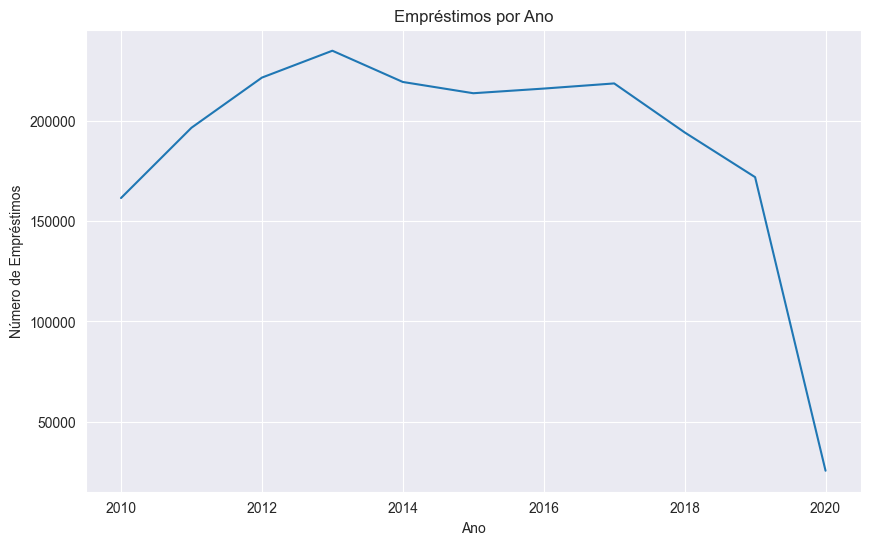

In [30]:
plotar_linha(x=contagem_emprestimos_ano.index, y=contagem_emprestimos_ano.values, xlabel='Ano', ylabel='Número de Empréstimos', titulo='Empréstimos por Ano')

### Qual é a quantidade de empréstimos por mês?

In [31]:
emprestimos_mes= df['data_emprestimo'].dt.month
contagem_emprestimos_mes = emprestimos_mes.value_counts().sort_index()
contagem_emprestimos_mes.index = ['Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

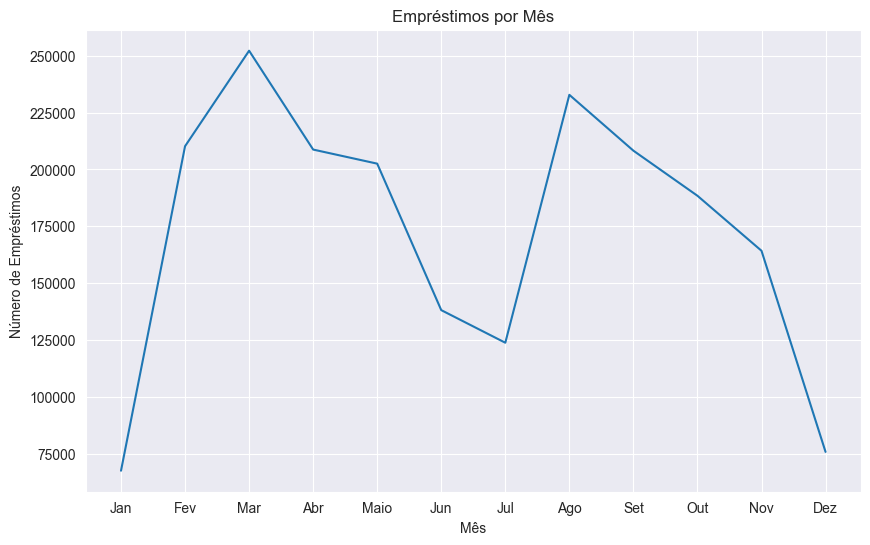

In [32]:
plotar_linha(x=contagem_emprestimos_mes.index, y=contagem_emprestimos_mes.values, xlabel='Mês', ylabel='Número de Empréstimos', titulo='Empréstimos por Mês')

### Qual é a quantidade de empréstimos por hora ao longo do dia ?

In [33]:
def plotar_barra(x, y, xlabel, ylabel, titulo):
    paleta_cores = sns.color_palette("Blues", n_colors=1)  
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, palette=paleta_cores)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(titulo)
    plt.show()

In [34]:
emprestimos_hora = df['data_emprestimo'].dt.hour
contagem_emprestimos_hora = emprestimos_hora.value_counts().sort_index()
contagem_emprestimos_hora

0         17
6         14
7      18777
8     103416
9     131273
10    185839
11    180048
12    148754
13    126987
14    150876
15    166672
16    210655
17    185340
18    182520
19    102129
20    127716
21     51191
22       247
23        51
Name: data_emprestimo, dtype: int64

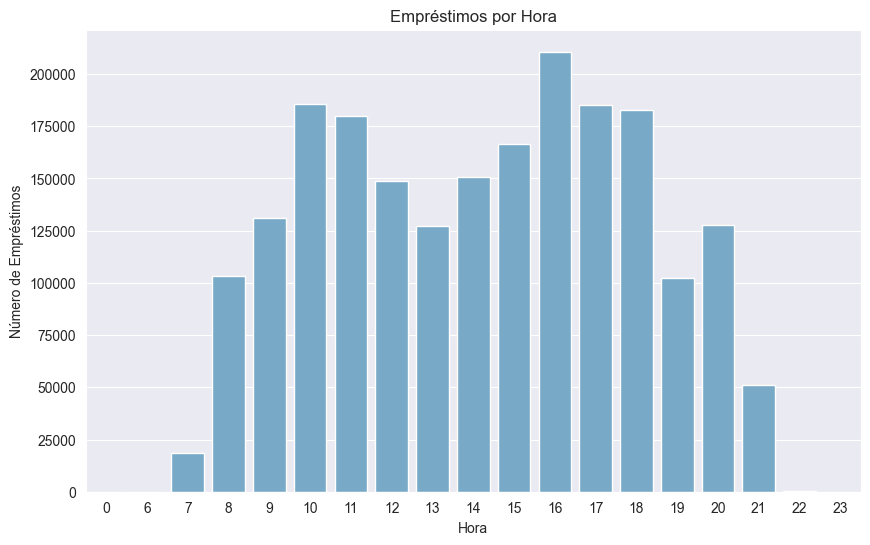

In [35]:
plotar_barra(x=contagem_emprestimos_hora.index, y=contagem_emprestimos_hora.values, xlabel='Hora', ylabel='Número de Empréstimos', titulo='Empréstimos por Hora')

---
<a id='day_4'></a>
### 3.4. Dia 4

In [36]:
def exibe_valores_unicos(serie, nome):
    num_valores = serie.nunique()
    valores = ', '.join(serie.unique().tolist())
    print(f'Os {num_valores} valores únicos para {nome} são: {valores}.')

In [37]:
exibe_valores_unicos(df['tipo_vinculo_usuario'], 'tipo de vínculo do usuário')

Os 8 valores únicos para tipo de vínculo do usuário são: ALUNO DE GRADUAÇÃO, ALUNO DE PÓS-GRADUAÇÃO, DOCENTE, DOCENTE EXTERNO, SERVIDOR TÉCNICO-ADMINISTRATIVO, ALUNO MÉDIO/TÉCNICO, USUÁRIO EXTERNO, OUTROS.


In [38]:
exibe_valores_unicos(df['CDU_geral'], 'CDU geral')

Os 9 valores únicos para CDU geral são: Ciências aplicadas, Linguagem, Ciências sociais, Geografia. Biografia. História., Matemática e ciências naturais, Religião, Generalidades, Filosofia e psicologia, Belas artes.


In [39]:
exibe_valores_unicos(df['biblioteca'], 'biblioteca')

Os 22 valores únicos para biblioteca são: Biblioteca Central Zila Mamede, Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba, Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN, Biblioteca Setorial do Centro Ciências da Saúde - CCS, Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia, Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET, Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA, Biblioteca Setorial Prof. Horácio Nicolas Solimo - ­ Engenharia Química - EQ - CT, Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ, Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA, Biblioteca Setorial do Departamento de Artes - DEART, Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - ­CT, Biblioteca Setorial Árvore do Conhecimento - Instituto do Cérebro - ICe, Biblioteca Setorial Moacyr de Góes - CE, Biblioteca Setorial

In [40]:
exibe_valores_unicos(df['colecao'], 'coleção')

Os 16 valores únicos para coleção são: Acervo Circulante, Folhetos, Teses, Dissertações, Monografias, Publicações de Autores do RN, Publicações da UFRN, Multimeios, Coleção Mossoroense, Eventos, Trabalho Acadêmico, Obras de Referência, Obras Raras, Literatura de Cordel, Coleção Zila Mamede, Necessidades Educacionais Específicas.


In [41]:
def contar_valores(serie):
    quantidade = serie.value_counts()
    percentagem = serie.value_counts(normalize=True)
    percentagem = (percentagem * 100).round(2)
    contagem_percentagem = pd.concat([quantidade, percentagem], axis=1)
    contagem_percentagem.columns = ['Quantidade', 'Porcentagem (%)']
    
    return contagem_percentagem

In [42]:
contar_valores(df['tipo_vinculo_usuario'])

,Quantidade,Porcentagem (%)
ALUNO DE GRADUAÇÃO,1612324,77.80
ALUNO DE PÓS-GRADUAÇÃO,302541,14.60
DOCENTE,70981,3.42
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.55
ALUNO MÉDIO/TÉCNICO,28029,1.35
DOCENTE EXTERNO,23949,1.16
USUÁRIO EXTERNO,2509,0.12
OUTROS,5,0.00


In [43]:
contar_valores(df['CDU_geral'])

,Quantidade,Porcentagem (%)
Ciências aplicadas,1425473,68.78
Ciências sociais,369536,17.83
Matemática e ciências naturais,68744,3.32
Generalidades,62521,3.02
Religião,62295,3.01
Filosofia e psicologia,60563,2.92
Geografia. Biografia. História.,7989,0.39
Belas artes,7911,0.38
Linguagem,7490,0.36


In [44]:
contar_valores(df['biblioteca'])

,Quantidade,Porcentagem (%)
Biblioteca Central Zila Mamede,1426122,68.81
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.72
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.74
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.21
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,2.97
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.22
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,1.97
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.55
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.40
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ - Macaiba,27219,1.31


In [45]:
contar_valores(df['colecao'])

,Quantidade,Porcentagem (%)
Acervo Circulante,2053120,99.06
Multimeios,7954,0.38
Monografias,4021,0.19
Dissertações,2406,0.12
Obras de Referência,1954,0.09
Publicações de Autores do RN,866,0.04
Publicações da UFRN,764,0.04
Teses,714,0.03
Folhetos,271,0.01
Necessidades Educacionais Específicas,130,0.01


<a id='day_5'></a>
### 3.5. Dia 5

In [46]:
df.columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario',
       'id_exemplar', 'colecao', 'biblioteca', 'status_material',
       'localizacao', 'CDU_geral'],
      dtype='object')

In [47]:
is_ano_apartir_2010 = (df['data_emprestimo'].dt.year >= 2010)
is_ano_ate_2020 = (df['data_emprestimo'].dt.year <= 2020)
is_graduacao = (df['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO')
is_pos_graduacao = (df['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO')
linhas_d5 = is_ano_apartir_2010 & is_ano_ate_2020 & (is_graduacao | is_pos_graduacao)
colunas_d5 = ['id_emprestimo', 'data_emprestimo','tipo_vinculo_usuario']

In [48]:
d5 = df.loc[linhas_d5, colunas_d5].copy()
d5['ano'] = d5['data_emprestimo'].dt.year
d5['mes'] = d5['data_emprestimo'].dt.month
d5['vinculo'] = d5['tipo_vinculo_usuario'].str.split('ALUNO DE').str[1].str.strip()
d5.head()

,id_emprestimo,data_emprestimo,tipo_vinculo_usuario,ano,mes,vinculo
0,709684,2010-01-04 07:44:10.721,ALUNO DE GRADUAÇÃO,2010,1,GRADUAÇÃO
1,726965,2010-03-01 12:40:56.212,ALUNO DE PÓS-GRADUAÇÃO,2010,3,PÓS-GRADUAÇÃO
2,709685,2010-01-04 07:44:10.750,ALUNO DE GRADUAÇÃO,2010,1,GRADUAÇÃO
3,717763,2010-02-11 11:16:30.335,ALUNO DE GRADUAÇÃO,2010,2,GRADUAÇÃO
4,729996,2010-03-04 13:36:26.599,ALUNO DE GRADUAÇÃO,2010,3,GRADUAÇÃO


In [49]:
emprestimos_ano_vinculo = d5.groupby(['ano', 'mes', 'vinculo'], as_index=False)['id_emprestimo'].count()
emprestimos_ano_vinculo

,ano,mes,vinculo,id_emprestimo
0,2010,1,GRADUAÇÃO,3012
1,2010,1,PÓS-GRADUAÇÃO,1125
2,2010,2,GRADUAÇÃO,7807
3,2010,2,PÓS-GRADUAÇÃO,1508
4,2010,3,GRADUAÇÃO,15419
...,...,...,...,...
242,2020,2,GRADUAÇÃO,8162
243,2020,2,PÓS-GRADUAÇÃO,1200
244,2020,3,GRADUAÇÃO,8702
245,2020,3,PÓS-GRADUAÇÃO,1483


In [50]:
def plotar_box(data, x, y):
    plt.figure(figsize=[15,8.27]);
    ax = sns.boxplot(data=data, x=x, y=y);
    ax.set_title('Boxplot');

In [51]:
def plotar_violino(data, x, y):
    plt.figure(figsize=[15,8.27]);
    ax = sns.violinplot(data=data, x=x, y=y);
    ax.set_title('Violinplot');

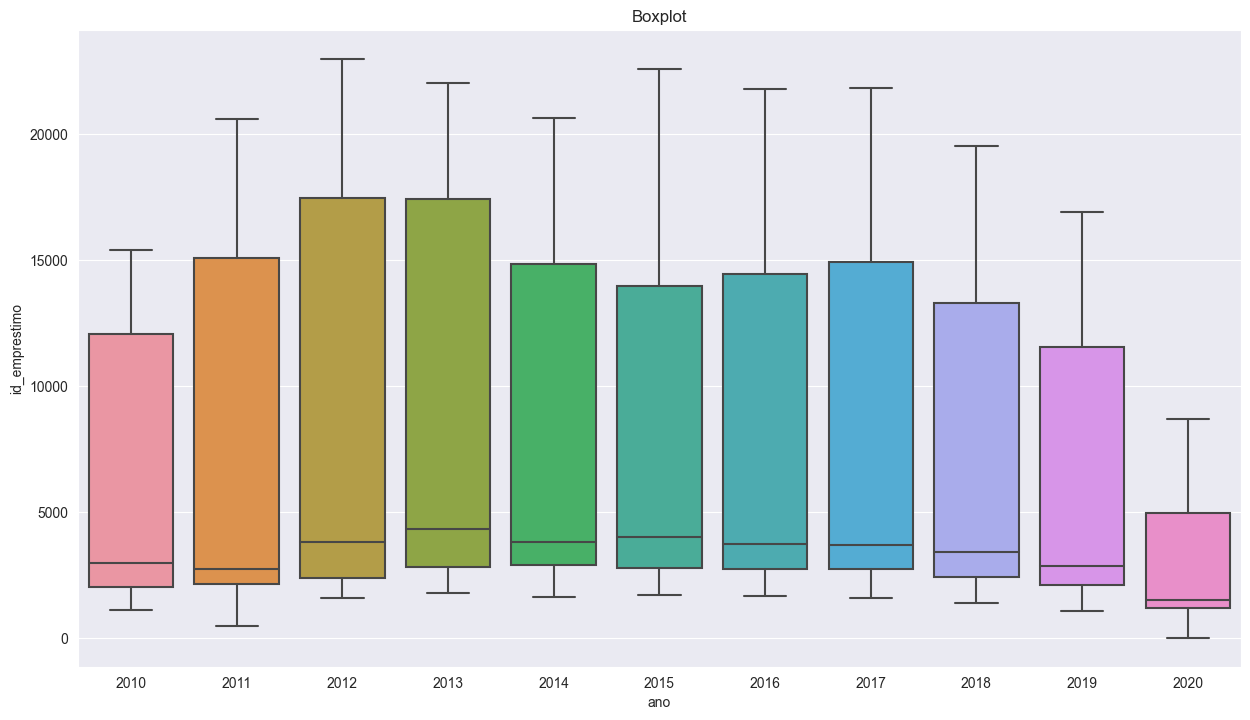

In [52]:
plotar_box(emprestimos_ano_vinculo, 'ano', 'id_emprestimo')

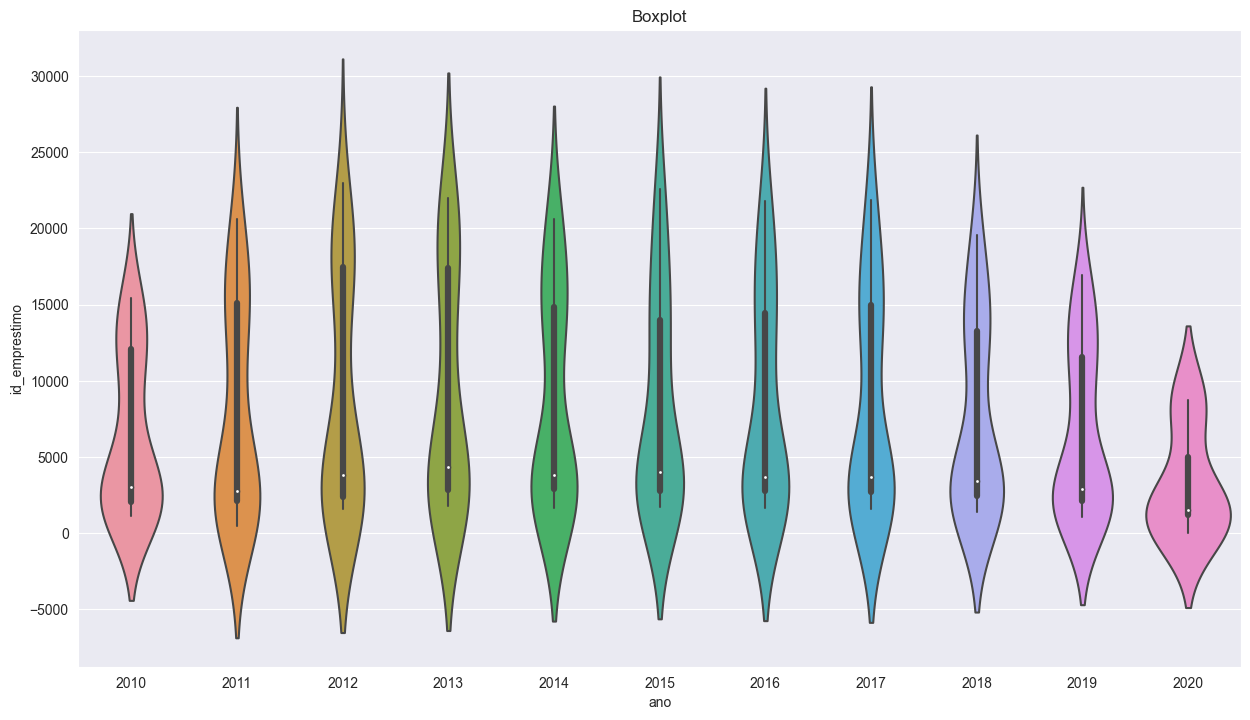

In [53]:
plotar_violino(emprestimos_ano_vinculo, 'ano', 'id_emprestimo')

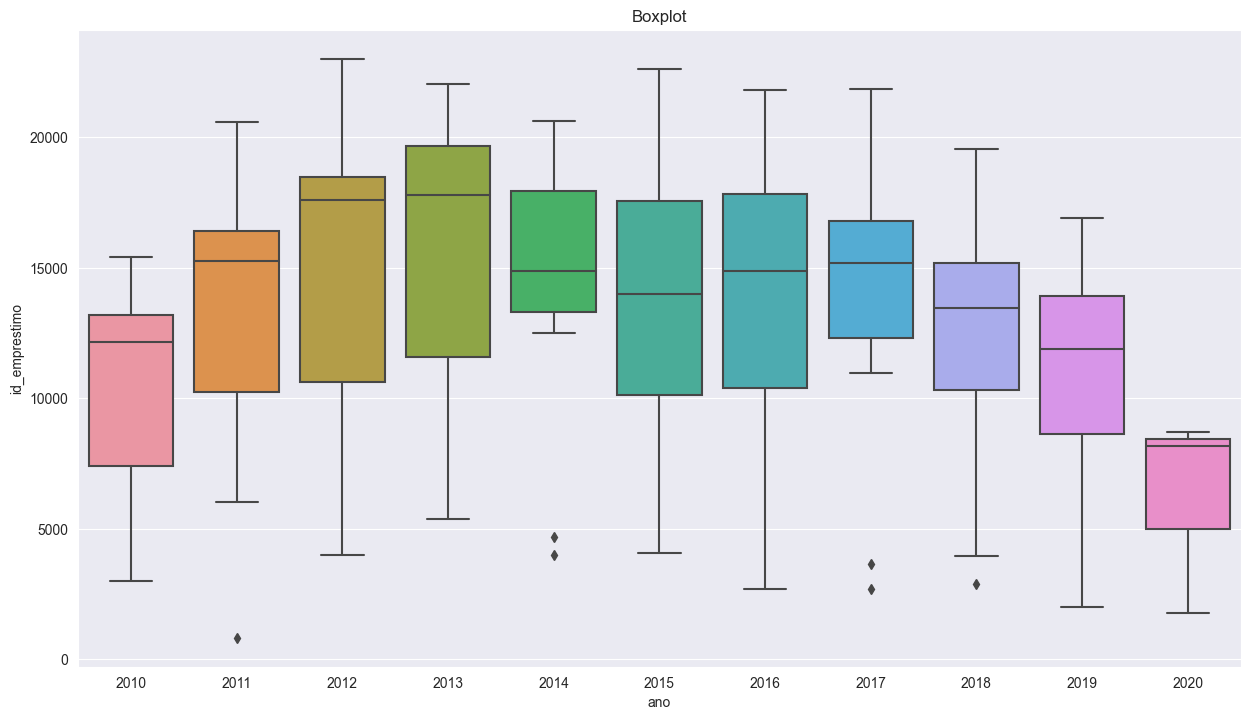

In [54]:
plotar_box(emprestimos_ano_vinculo[emprestimos_ano_vinculo['vinculo']=='GRADUAÇÃO'], 'ano', 'id_emprestimo')

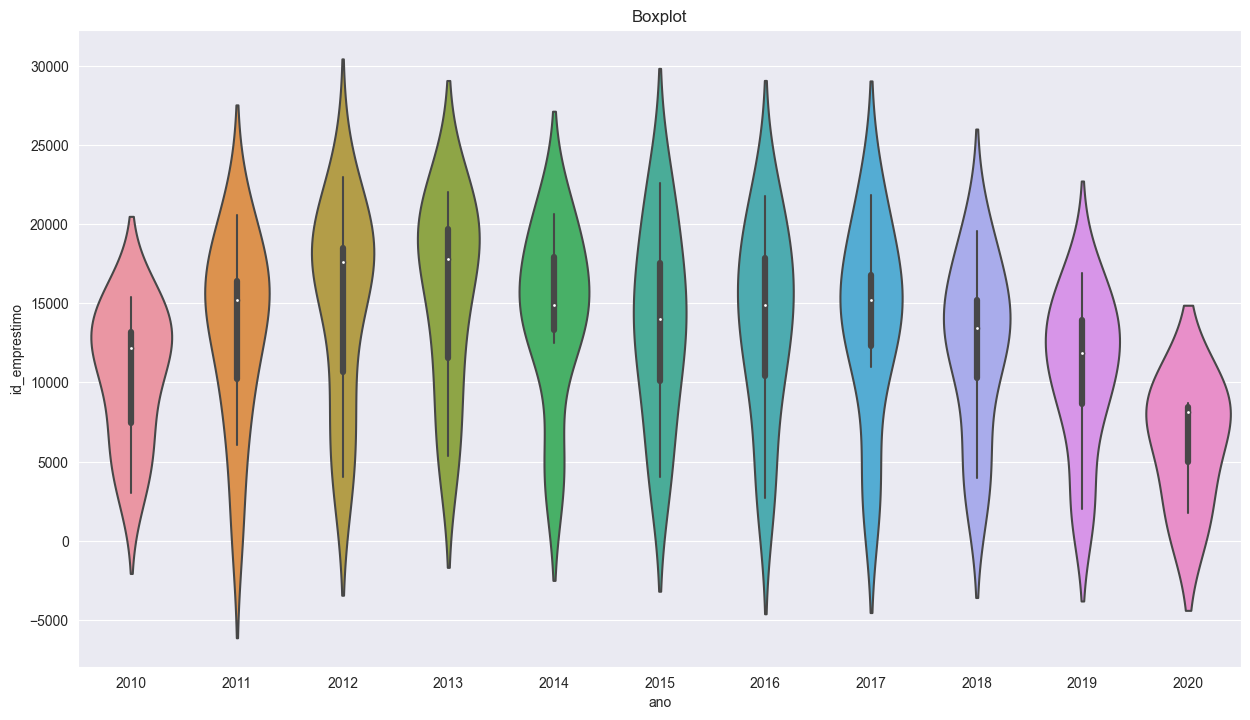

In [55]:
plotar_violino(emprestimos_ano_vinculo[emprestimos_ano_vinculo['vinculo']=='GRADUAÇÃO'], 'ano', 'id_emprestimo')

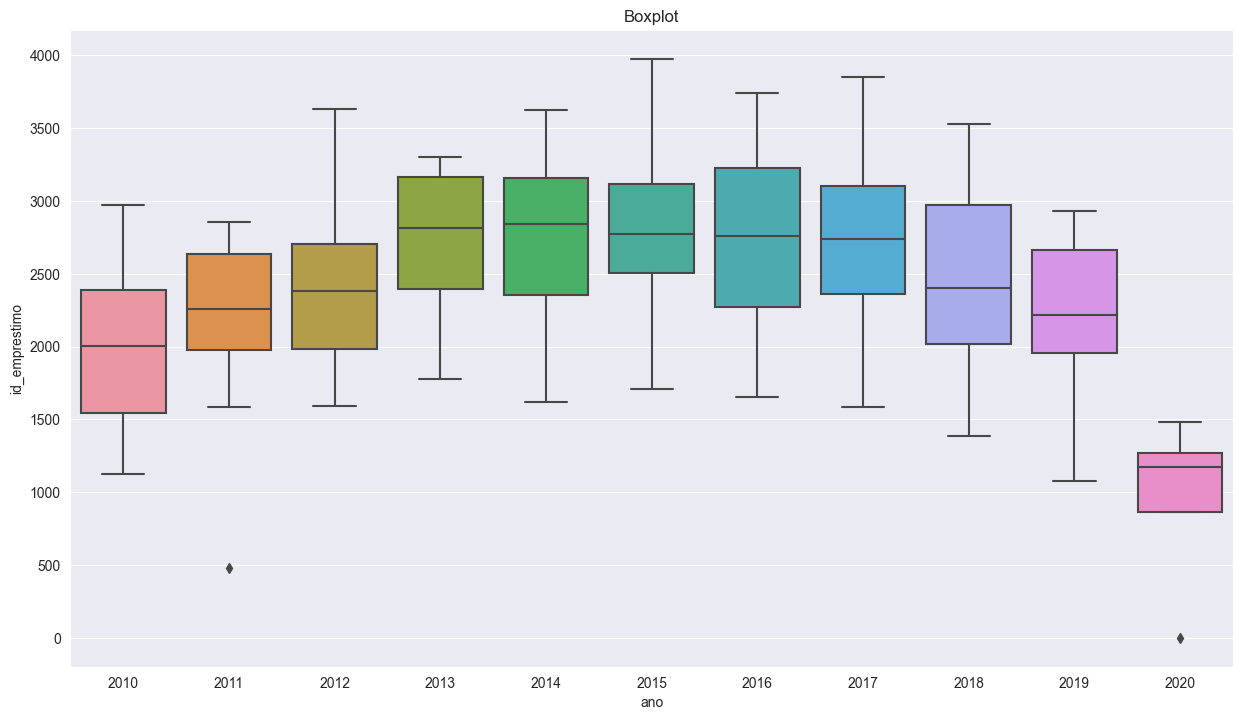

In [56]:
plotar_box(emprestimos_ano_vinculo[emprestimos_ano_vinculo['vinculo']=='PÓS-GRADUAÇÃO'], 'ano', 'id_emprestimo')

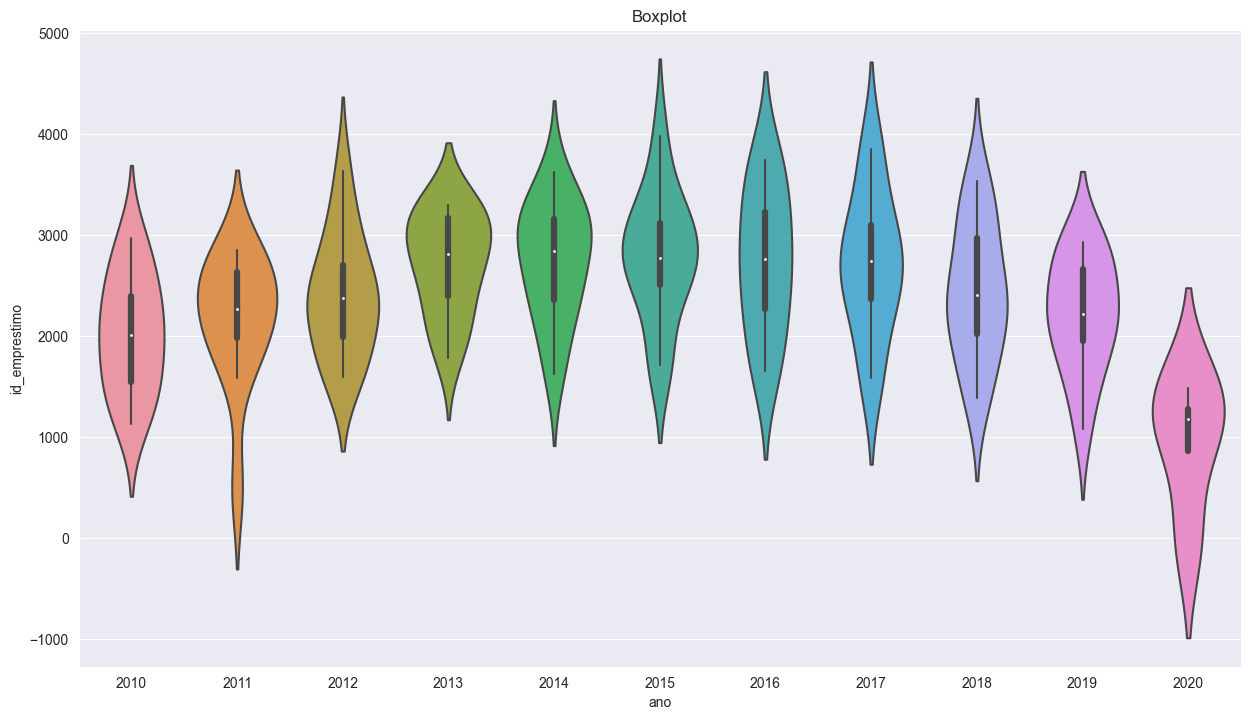

In [57]:
plotar_violino(emprestimos_ano_vinculo[emprestimos_ano_vinculo['vinculo']=='PÓS-GRADUAÇÃO'], 'ano', 'id_emprestimo')

---
<a id='conclusion'></a>
## 4. Conclusão

---
<a id='references'></a>
## Referências

Alura - 7 Days of Code - Dados - Python Pandas:
https://7daysofcode.io/matricula/pandas
 , acessado em 24/09/2023.

Github - FranciscoFoz - 7_Days_of_Code_Alura-Python-Pandas:
https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/tree/main
 , acessado em 24/09/2023.

---
<div style="text-align: center"> Copyright &copy; 2023 | Leonardo Simões | All Rights Reserved </div>

---